<h2 align=center> Fine-Tune BERT for Text Classification with TensorFlow</h2>

<div align="center">
    <img width="512px" src='https://drive.google.com/uc?id=1fnJTeJs5HUpz7nix-F9E6EZdgUflqyEu' />
    <p style="text-align: center;color:gray">Figure 1: BERT Classification Model</p>
</div>

In this [project](https://www.coursera.org/projects/fine-tune-bert-tensorflow/), you will learn how to fine-tune a BERT model for text classification using TensorFlow and TF-Hub.

The pretrained BERT model used in this project is [available](https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/2) on [TensorFlow Hub](https://tfhub.dev/).

### Learning Objectives

By the time you complete this project, you will be able to:

- Build TensorFlow Input Pipelines for Text Data with the [`tf.data`](https://www.tensorflow.org/api_docs/python/tf/data) API
- Tokenize and Preprocess Text for BERT
- Fine-tune BERT for text classification with TensorFlow 2 and [TF Hub](https://tfhub.dev)

### Prerequisites

In order to be successful with this project, it is assumed you are:

- Competent in the Python programming language
- Familiar with deep learning for Natural Language Processing (NLP)
- Familiar with TensorFlow, and its Keras API

### Contents

This project/notebook consists of several Tasks.

- **[Task 1]()**: Introduction to the Project.
- **[Task 2]()**: Setup your TensorFlow and Colab Runtime
- **[Task 3]()**: Download and Import the Quora Insincere Questions Dataset
- **[Task 4]()**: Create tf.data.Datasets for Training and Evaluation
- **[Task 5]()**: Download a Pre-trained BERT Model from TensorFlow Hub
- **[Task 6]()**: Tokenize and Preprocess Text for BERT
- **[Task 7]()**: Wrap a Python Function into a TensorFlow op for Eager Execution
- **[Task 8]()**: Create a TensorFlow Input Pipeline with `tf.data`
- **[Task 9]()**: Add a Classification Head to the BERT `hub.KerasLayer`
- **[Task 10]()**: Fine-Tune BERT for Text Classification
- **[Task 11]()**: Evaluate the BERT Text Classification Model

## Task 2: Setup your TensorFlow and Colab Runtime.

You will only be able to use the Colab Notebook after you save it to your Google Drive folder. Click on the File menu and select “Save a copy in Drive…

![Copy to Drive](https://drive.google.com/uc?id=1CH3eDmuJL8WR0AP1r3UE6sOPuqq8_Wl7)


### Check GPU Availability

Check if your Colab notebook is configured to use Graphical Processing Units (GPUs). If zero GPUs are available, check if the Colab notebook is configured to use GPUs (Menu > Runtime > Change Runtime Type).

![Hardware Accelerator Settings](https://drive.google.com/uc?id=1qrihuuMtvzXJHiRV8M7RngbxFYipXKQx)


In [1]:
!nvidia-smi

Wed Mar 27 00:25:15 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   34C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

### Install TensorFlow and TensorFlow Model Garden

In [2]:
import tensorflow as tf
print(tf.version.VERSION)

2.15.0


In [ ]:
!pip install -q tensorflow==2.3.0

In [3]:
!git clone --depth 1 -b v2.15.0 https://github.com/tensorflow/models.git

Cloning into 'models'...
remote: Enumerating objects: 2375, done.
remote: Counting objects: 100% (2375/2375), done.
remote: Compressing objects: 100% (1760/1760), done.
remote: Total 2375 (delta 752), reused 1014 (delta 574), pack-reused 0
Receiving objects: 100% (2375/2375), 18.66 MiB | 25.31 MiB/s, done.
Resolving deltas: 100% (752/752), done.
Note: switching to '2a00ddbb0bfc857da946c1780bbd65eb662c2119'.

You are in 'detached HEAD' state. You can look around, make experimental
changes and commit them, and you can discard any commits you make in this
state without impacting any branches by switching back to a branch.

If you want to create a new branch to retain commits you create, you may
do so (now or later) by using -c with the switch command. Example:

  git switch -c <new-branch-name>

Or undo this operation with:

  git switch -

Turn off this advice by setting config variable advice.detachedHead to false



In [4]:
# install requirements to use tensorflow/models repository
!pip install -Uqr models/official/requirements.txt
# you may have to restart the runtime afterwards

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.6/84.6 kB 7.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 288.2/288.2 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.4/38.4 MB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.5/242.5 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 2.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

## Restart the Runtime

**Note**
After installing the required Python packages, you'll need to restart the Colab Runtime Engine (Menu > Runtime > Restart runtime...)

![Restart of the Colab Runtime Engine](https://drive.google.com/uc?id=1xnjAy2sxIymKhydkqb0RKzgVK9rh3teH)

## Task 3: Download and Import the Quora Insincere Questions Dataset

In [1]:
import numpy as np
import tensorflow as tf
import tensorflow_hub as hub
import sys
sys.path.append('models')
from official.nlp.data import classifier_data_lib
from official.nlp.tools import tokenization
from official.nlp import optimization

In [2]:
# import official.nlp
import os
print(os.listdir("/content/models/official"))

['utils', 'modeling', 'recommendation', 'nlp', '__pycache__', 'legacy', 'README.md', '__init__.py', 'projects', 'pip_package', 'benchmark', 'README-TPU.md', 'requirements.txt', 'core', 'vision', 'common', 'nightly_requirements.txt']


In [3]:
print(os.listdir("/content/models/official/nlp/tools"))

['export_tfhub_lib_test.py', 'tokenization_test.py', '__pycache__', 'export_tfhub_lib.py', 'tf2_albert_encoder_checkpoint_converter.py', '__init__.py', 'tf2_bert_encoder_checkpoint_converter.py', 'export_tfhub.py', 'squad_evaluate_v1_1.py', 'tf1_bert_checkpoint_converter_lib.py', 'tokenization.py', 'squad_evaluate_v2_0.py']


In [4]:
print("TF Version: ", tf.__version__)
print("Eager mode: ", tf.executing_eagerly())
print("Hub version: ", hub.__version__)
print("GPU is", "available" if tf.config.experimental.list_physical_devices("GPU") else "NOT AVAILABLE")

TF Version:  2.15.0
Eager mode:  True
Hub version:  0.16.1
GPU is available


A downloadable copy of the [Quora Insincere Questions Classification data](https://www.kaggle.com/c/quora-insincere-questions-classification/data) can be found [https://archive.org/download/fine-tune-bert-tensorflow-train.csv/train.csv.zip](https://archive.org/download/fine-tune-bert-tensorflow-train.csv/train.csv.zip). Decompress and read the data into a pandas DataFrame.

In [5]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split



In [7]:
# Load dataset from link and unzip it

data_df = pd.read_csv("https://archive.org/download/fine-tune-bert-tensorflow-train.csv/train.csv.zip",
                      compression = "zip", low_memory = False)

data_df.shape

(1306122, 3)

In [8]:
# Get last 20 entries of dataset

data_df.tail(20)

,qid,question_text,target
1306102,ffff3778790af9baae76,What steps can I take to live a normal life if...,0
1306103,ffff3f0a2449ffe4b9ff,Isn't Trump right after all? Why should the US...,1
1306104,ffff41393389d4206066,Is 33 too late for a career in creative advert...,0
1306105,ffff42493fc203cd9532,What is difference between the filteration wor...,0
1306106,ffff48dd47bee89fff79,"If the universe ""popped"" into existence from n...",0
1306107,ffff5fd051a032f32a39,How does a shared service technology team meas...,0
1306108,ffff6d528040d3888b93,How is DSATM civil engineering?,0
1306109,ffff8776cd30cdc8d7f8,Do you know any problem that depends solely on...,0
1306110,ffff94d427ade3716cd1,What are some comic ideas for you Tube videos ...,0
1306111,ffffa382c58368071dc9,"If you had $10 million of Bitcoin, could you s...",0


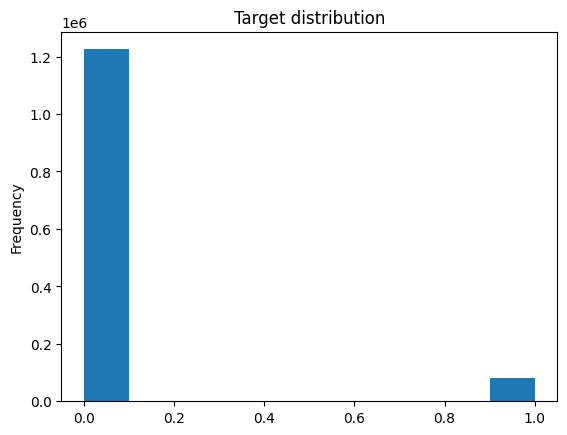

In [9]:
# Visualise label distribution

data_df.target.plot(kind = "hist", title = "Target distribution");

## Task 4: Create tf.data.Datasets for Training and Evaluation

In [10]:
# Split training and validation data so that the imbalance is preserved

train_df, rest = train_test_split(data_df, random_state = 42, train_size = 0.0075, stratify = data_df.target.values)
valid_df, _ = train_test_split(rest, random_state = 42, train_size = 0.00075, stratify = rest.target.values)

In [11]:
train_df.shape, valid_df.shape

((9795, 3), (972, 3))

In [22]:
# Creating training and validation tensor set

with tf.device('/cpu:0'):
  train_data = tf.data.Dataset.from_tensor_slices((train_df["question_text"].values, train_df["target"].values)) # get the training data
  validation_data = tf.data.Dataset.from_tensor_slices((valid_df["question_text"].values, valid_df["target"].values)) # get the validation data

  for text, label in train_data.take(1):
    print(text)
    print(label)

tf.Tensor(b'Why are unhealthy relationships so desirable?', shape=(), dtype=string)
tf.Tensor(0, shape=(), dtype=int64)


## Task 5: Download a Pre-trained BERT Model from TensorFlow Hub

In [13]:
"""
Each line of the dataset is composed of the review text and its label
- Data preprocessing consists of transforming text to BERT input features:
input_word_ids, input_mask, segment_ids
- In the process, tokenizing the text is done with the provided BERT model tokenizer
"""

label_list = [0, 1] # Label categories
max_seq_length = 128 # maximum length of (token) input sequences
train_batch_size = 32 # size of training batch


# Get BERT layer and tokenizer:
# More details here: https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/2

# import BERT layer
bert_layer = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/2", trainable = True) # trainable = True to fine-tune all parameters

# get vocabulary file, check if it's case sensitive, then tokenise
vocab_file = bert_layer.resolved_object.vocab_file.asset_path.numpy()
lower_case_vocab = bert_layer.resolved_object.do_lower_case.numpy()
tokeniser = tokenization.FullTokenizer(vocab_file, lower_case_vocab)

In [14]:
# tokenise sample sentence
tokeniser.wordpiece_tokenizer.tokenize("hi, how are you doing?")

['hi', '##,', 'how', 'are', 'you', 'doing', '##?']

In [15]:
# Convert tokens to ids
tokeniser.convert_tokens_to_ids(tokeniser.wordpiece_tokenizer.tokenize("hi, how are you doing?"))

[7632, 29623, 2129, 2024, 2017, 2725, 29632]

## Task 6: Tokenize and Preprocess Text for BERT

<div align="center">
    <img width="512px" src='https://drive.google.com/uc?id=1-SpKFELnEvBMBqO7h3iypo8q9uUUo96P' />
    <p style="text-align: center;color:gray">Figure 2: BERT Tokenizer</p>
</div>

We'll need to transform our data into a format BERT understands. This involves two steps. First, we create InputExamples using `classifier_data_lib`'s constructor `InputExample` provided in the BERT library.

In [16]:
# This provides a function to convert row to input features and label

def to_feature(text, label, label_list=label_list, max_seq_length=max_seq_length, tokenizer=tokeniser):

  # input example used by BERT to create input features
  input_example = classifier_data_lib.InputExample(guid = None, # guid set a None given function only uses one example at a time
                                                   text_a = text.numpy(),  # text to be classified
                                                   text_b = None, # next sentence prediction is disabled
                                                   label = label.numpy())

  # get feature object of example imput
  input_feature = classifier_data_lib.convert_single_example(0, input_example, label_list, max_seq_length, tokeniser)

  # return fields from feature object

  return (input_feature.input_ids, input_feature.input_mask, input_feature.segment_ids, input_feature.label_id)


You want to use [`Dataset.map`](https://www.tensorflow.org/api_docs/python/tf/data/Dataset#map) to apply this function to each element of the dataset. [`Dataset.map`](https://www.tensorflow.org/api_docs/python/tf/data/Dataset#map) runs in graph mode.

- Graph tensors do not have a value.
- In graph mode you can only use TensorFlow Ops and functions.

So you can't `.map` this function directly: You need to wrap it in a [`tf.py_function`](https://www.tensorflow.org/api_docs/python/tf/py_function). The [`tf.py_function`](https://www.tensorflow.org/api_docs/python/tf/py_function) will pass regular tensors (with a value and a `.numpy()` method to access it), to the wrapped python function.

## Task 7: Wrap a Python Function into a TensorFlow op for Eager Execution

In [17]:
def to_feature_map(text, label):

  # Wrapper function which maps raw text data to a feature format required by BERT

  # Using py_function() to use created function in tf.Dataset (converting graph tensor to regular tensor)
  input_ids, input_mask, segment_ids, label_id = tf.py_function(to_feature, inp = [text, label],
                                                                Tout = [tf.int32, tf.int32, tf.int32, tf.int32]) # output type
  # set shape of returned tensors
  input_ids.set_shape([max_seq_length])
  input_mask.set_shape([max_seq_length])
  segment_ids.set_shape([max_seq_length])
  label_id.set_shape([]) # we don't know its shape, so leave it empty

  # structure training data into a dictionary structure

  x = {
      "input_word_ids": input_ids,
      "input_mask" : input_mask,
      "input_type_ids": segment_ids
  }


  return (x, label_id)

## Task 8: Create a TensorFlow Input Pipeline with `tf.data`

In [23]:
with tf.device('/cpu:0'):
  # train

  train_data = (train_data.map(to_feature_map, # mapping training data to approate structure
                               num_parallel_calls = tf.data.experimental.AUTOTUNE) # optimal number of parallel calls
                .shuffle(1000) # suffle mapped data
                .batch(32, drop_remainder = True) # batch suffled data
                .prefetch(tf.data.experimental.AUTOTUNE)) # reduces step time by overlapping preprocessing and model execution

  # valid

  validation_data = (validation_data.map(to_feature_map, # mapping training data to approate structure
                               num_parallel_calls = tf.data.experimental.AUTOTUNE)
  .shuffle(1000)
  .batch(32, drop_remainder = True)
  .prefetch(tf.data.experimental.AUTOTUNE))


The resulting `tf.data.Datasets` return `(features, labels)` pairs, as expected by [`keras.Model.fit`](https://www.tensorflow.org/api_docs/python/tf/keras/Model#fit):

In [24]:
# train data spec
train_data.element_spec

({'input_word_ids': TensorSpec(shape=(32, 128), dtype=tf.int32, name=None),
  'input_mask': TensorSpec(shape=(32, 128), dtype=tf.int32, name=None),
  'input_type_ids': TensorSpec(shape=(32, 128), dtype=tf.int32, name=None)},
 TensorSpec(shape=(32,), dtype=tf.int32, name=None))

In [25]:
# valid data spec
validation_data.element_spec

({'input_word_ids': TensorSpec(shape=(32, 128), dtype=tf.int32, name=None),
  'input_mask': TensorSpec(shape=(32, 128), dtype=tf.int32, name=None),
  'input_type_ids': TensorSpec(shape=(32, 128), dtype=tf.int32, name=None)},
 TensorSpec(shape=(32,), dtype=tf.int32, name=None))

## Task 9: Add a Classification Head to the BERT Layer

<div align="center">
    <img width="512px" src='https://drive.google.com/uc?id=1fnJTeJs5HUpz7nix-F9E6EZdgUflqyEu' />
    <p style="text-align: center;color:gray">Figure 3: BERT Layer</p>
</div>

In [27]:
# Building the model
def create_model():
  input_word_ids = tf.keras.layers.Input(shape=(max_seq_length,), dtype=tf.int32,
                                       name="input_word_ids")
  input_mask = tf.keras.layers.Input(shape=(max_seq_length,), dtype=tf.int32,
                                   name="input_mask")
  input_type_ids = tf.keras.layers.Input(shape=(max_seq_length,), dtype=tf.int32,
                                    name="input_type_ids")

  pooled_output, sequence_output = bert_layer([input_word_ids, input_mask, input_type_ids])

  drop = tf.keras.layers.Dropout(0.4)(pooled_output)
  output = tf.keras.layers.Dense(1, activation = "sigmoid", name = "output")(drop)

  # Unify layers
  model = tf.keras.Model(
      inputs = {
          "input_word_ids": input_word_ids,
          "input_mask" : input_mask,
          "input_type_ids": input_type_ids
      },
      outputs = output
  )

  return model

## Task 10: Fine-Tune BERT for Text Classification

In [28]:
# Creating and compiling the model
model = create_model()
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 2e-5),
              loss = tf.keras.losses.BinaryCrossentropy(),
              metrics = [tf.keras.metrics.BinaryAccuracy()])
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_word_ids (InputLayer  [(None, 128)]                0         []                            
 )                                                                                                
                                                                                                  
 input_mask (InputLayer)     [(None, 128)]                0         []                            
                                                                                                  
 input_type_ids (InputLayer  [(None, 128)]                0         []                            
 )                                                                                                
                                                                                              

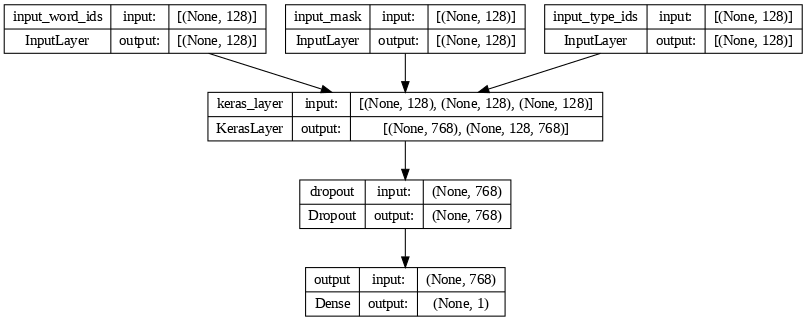

In [29]:
tf.keras.utils.plot_model(model = model, show_shapes = True, dpi = 76)

In [30]:
# Train model

epochs = 4
history = model.fit(train_data,
                    validation_data = validation_data,
                    epochs = epochs,
                    verbose = 1)

Epoch 1/4
306/306 [==============================] - 288s 808ms/step - loss: 0.1762 - binary_accuracy: 0.9383 - val_loss: 0.1330 - val_binary_accuracy: 0.9552
Epoch 2/4
306/306 [==============================] - 253s 822ms/step - loss: 0.0953 - binary_accuracy: 0.9647 - val_loss: 0.1306 - val_binary_accuracy: 0.9510
Epoch 3/4
306/306 [==============================] - 258s 840ms/step - loss: 0.0486 - binary_accuracy: 0.9831 - val_loss: 0.1686 - val_binary_accuracy: 0.9583
Epoch 4/4
306/306 [==============================] - 259s 843ms/step - loss: 0.0251 - binary_accuracy: 0.9908 - val_loss: 0.1747 - val_binary_accuracy: 0.9490


## Task 11: Evaluate the BERT Text Classification Model

In [32]:
import matplotlib.pyplot as plt

def plot_graphs(history, metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+metric], '')
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.legend([metric, 'val_'+metric])
  plt.show()

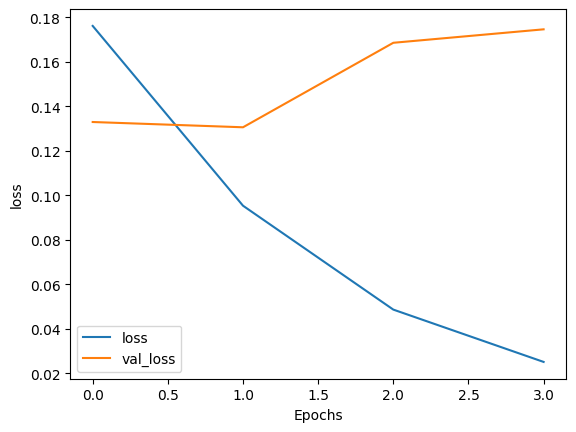

In [33]:
# plot loss history
plot_graphs(history, 'loss')

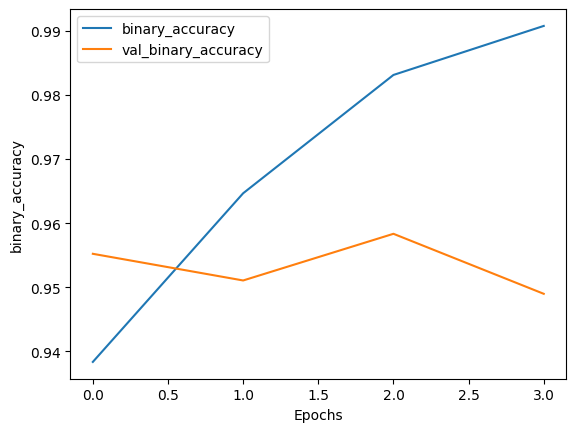

In [34]:
plot_graphs(history, "binary_accuracy")

In [35]:
# Testing with sample data
sample_data = ["Why the US people dislike China?", "How can I make sure my parents listen to me?",
               "What is the greatest prank ever made?", "Is there something I should omit when meeting someone I want to date?",
               "Why are the people so toxic in the internet?", "My husband told me a few people tend to sleep with their eyes open. Is it true? And why?"]
test_data = tf.data.Dataset.from_tensor_slices((sample_data, [0]*len(sample_data)))
test_data = (test_data.map(to_feature_map).batch(1))
preds = model.predict(test_data)
threshold = 0.5 # put any value between 0 and 1

6/6 [==============================] - 1s 22ms/step


In [36]:
["Insincere" if pred >= threshold else "Sincere" for pred in preds]

['Insincere', 'Sincere', 'Sincere', 'Sincere', 'Insincere', 'Sincere']